In [0]:
from tensorflow.keras.applications.vgg16 import VGG16

In [0]:
pre_trained_model = VGG16(include_top = False,
                            input_shape = (156,156,3),
                            weights = 'imagenet')

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/sample_data/test.csv
/content/sample_data/train.csv
/content/sample_data/test/59.jpg
/content/sample_data/test/232.jpg
/content/sample_data/test/194.jpg
/content/sample_data/test/410.jpg
/content/sample_data/test/437.jpg
/content/sample_data/test/346.jpg
/content/sample_data/test/129.jpg
/content/sample_data/test/448.jpg
/content/sample_data/test/360.jpg
/content/sample_data/test/508.jpg
/content/sample_data/test/416.jpg
/content/sample_data/test/269.jpg
/content/sample_data/test/349.jpg
/content/sample_data/test/256.jpg
/content/sample_data/test/518.jpg
/content/sample_data/test/290.jpg
/content/sample_data/test/479.jpg
/content/sample_data/test/373.jpg
/content/sample_data/test/286.jpg
/content/sample_data/test/414.jpg
/content/sample_data/test/411.jpg
/content/sample_data/test/196.jpg
/content/sample_data/test/239.jpg
/content/sample_data/test/189.jpg
/content/sample_data/test/520.jpg
/content/sample_data/test/429.jpg
/content/sample_data/test/220.jpg
/content/sample_data/t

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os
import random
from shutil import copyfile

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train_dir = '/content/sample_data/train/'
test_dir = '/content/sample_data/test/'
train_csv = pd.read_csv(r'/content/sample_data/train.csv')
test_csv = pd.read_csv(r'/content/sample_data/test.csv')

In [0]:
os.mkdir(r'/content/sample_data/identify-dance-form')
os.mkdir(r'/content/sample_data/identify-dance-form/training')
os.mkdir(r'/content/sample_data/identify-dance-form/testing')
os.mkdir(r'/content/sample_data/identify-dance-form/source')
os.mkdir(r'/content/sample_data/identify-dance-form/training/manipuri')
os.mkdir(r'/content/sample_data/identify-dance-form/testing/manipuri')
os.mkdir(r'/content/sample_data/identify-dance-form/source/manipuri')
os.mkdir(r'/content/sample_data/identify-dance-form/training/bharatanatyam')
os.mkdir(r'/content/sample_data/identify-dance-form/testing/bharatanatyam')
os.mkdir(r'/content/sample_data/identify-dance-form/source/bharatanatyam')
os.mkdir(r'/content/sample_data/identify-dance-form/training/odissi')
os.mkdir(r'/content/sample_data/identify-dance-form/testing/odissi')
os.mkdir(r'/content/sample_data/identify-dance-form/source/odissi')
os.mkdir(r'/content/sample_data/identify-dance-form/training/kathakali')
os.mkdir(r'/content/sample_data/identify-dance-form/testing/kathakali')
os.mkdir(r'/content/sample_data/identify-dance-form/source/kathakali')
os.mkdir(r'/content/sample_data/identify-dance-form/training/kathak')
os.mkdir(r'/content/sample_data/identify-dance-form/testing/kathak')
os.mkdir(r'/content/sample_data/identify-dance-form/source/kathak')
os.mkdir(r'/content/sample_data/identify-dance-form/training/sattriya')
os.mkdir(r'/content/sample_data/identify-dance-form/testing/sattriya')
os.mkdir(r'/content/sample_data/identify-dance-form/source/sattriya')
os.mkdir(r'/content/sample_data/identify-dance-form/training/kuchipudi')
os.mkdir(r'/content/sample_data/identify-dance-form/testing/kuchipudi')
os.mkdir(r'/content/sample_data/identify-dance-form/source/kuchipudi')
os.mkdir(r'/content/sample_data/identify-dance-form/training/mohiniyattam')
os.mkdir(r'/content/sample_data/identify-dance-form/testing/mohiniyattam')
os.mkdir(r'/content/sample_data/identify-dance-form/source/mohiniyattam')
os.mkdir('/content/sample_data/identify-dance-form/tests')
os.mkdir('/content/sample_data/identify-dance-form/tests/unknown')

In [0]:
files = []
for  r, d, f in os.walk(train_dir):
    for file in f:
        if '.jpg' in file:
            files.append(file)

In [11]:
print(files)

['384.jpg', '257.jpg', '389.jpg', '31.jpg', '418.jpg', '407.jpg', '188.jpg', '127.jpg', '184.jpg', '179.jpg', '417.jpg', '459.jpg', '158.jpg', '295.jpg', '130.jpg', '168.jpg', '361.jpg', '282.jpg', '123.jpg', '15.jpg', '159.jpg', '37.jpg', '117.jpg', '51.jpg', '263.jpg', '207.jpg', '357.jpg', '195.jpg', '30.jpg', '24.jpg', '4.jpg', '327.jpg', '452.jpg', '274.jpg', '387.jpg', '247.jpg', '376.jpg', '237.jpg', '333.jpg', '297.jpg', '348.jpg', '185.jpg', '143.jpg', '101.jpg', '99.jpg', '305.jpg', '166.jpg', '309.jpg', '250.jpg', '181.jpg', '413.jpg', '268.jpg', '314.jpg', '85.jpg', '177.jpg', '344.jpg', '331.jpg', '68.jpg', '308.jpg', '483.jpg', '469.jpg', '88.jpg', '46.jpg', '118.jpg', '29.jpg', '350.jpg', '39.jpg', '255.jpg', '329.jpg', '427.jpg', '74.jpg', '325.jpg', '218.jpg', '54.jpg', '103.jpg', '293.jpg', '321.jpg', '63.jpg', '141.jpg', '352.jpg', '480.jpg', '423.jpg', '453.jpg', '259.jpg', '234.jpg', '422.jpg', '91.jpg', '433.jpg', '53.jpg', '426.jpg', '214.jpg', '299.jpg', '486.jp

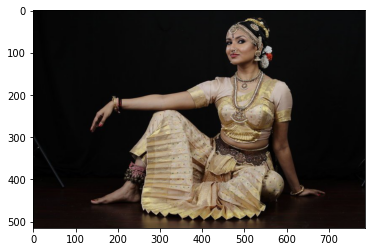

In [14]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(os.path.join(train_dir,files[0])))

In [0]:
for x in files:
    if (train_csv[train_csv['Image'] == x]['target'] == 'odissi').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/content/sample_data/identify-dance-form/source/odissi/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'manipuri').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/content/sample_data/identify-dance-form/source/manipuri/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'bharatanatyam').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/content/sample_data/identify-dance-form/source/bharatanatyam/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'kathakali').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/content/sample_data/identify-dance-form/source/kathakali/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'kathak').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/content/sample_data/identify-dance-form/source/kathak/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'sattriya').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/content/sample_data/identify-dance-form/source/sattriya/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'kuchipudi').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/content/sample_data/identify-dance-form/source/kuchipudi/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'mohiniyattam').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/content/sample_data/identify-dance-form/source/mohiniyattam/',x)
        copyfile(train_temp, final_train)

In [0]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    shuffle=random.sample(os.listdir(SOURCE),len(os.listdir(SOURCE)))
    train_data_length=int(len(os.listdir(SOURCE))*SPLIT_SIZE)
    test_data_length=int(len(os.listdir(SOURCE))-train_data_length)
    train_data=shuffle[0:train_data_length]
    test_data=shuffle[-test_data_length:]
    for x in train_data:
        train_temp=os.path.join(SOURCE,x)
        final_train=os.path.join(TRAINING,x)
        copyfile(train_temp,final_train)
    for x in test_data:
        test_temp=os.path.join(SOURCE,x)
        final_test=os.path.join(TESTING,x)
        copyfile(test_temp,final_test)

In [0]:
bhatanatyam_source_dir = '/content/sample_data/identify-dance-form/source/bharatanatyam/'
bhatanatyam_training_dir = '/content/sample_data/identify-dance-form/training/bharatanatyam/'
bhatanatyam_testing_dir = '/content/sample_data/identify-dance-form/testing/bharatanatyam/'

kathak_source_dir = '/content/sample_data/identify-dance-form/source/kathak/'
kathak_training_dir = '/content/sample_data/identify-dance-form/training/kathak/'
kathak_testing_dir = '/content/sample_data/identify-dance-form/testing/kathak/'

kathakali_source_dir = '/content/sample_data/identify-dance-form/source/kathakali/'
kathakali_training_dir = '/content/sample_data/identify-dance-form/training/kathakali/'
kathakali_testing_dir = '/content/sample_data/identify-dance-form/testing/kathakali/'

kuchipudi_source_dir = '/content/sample_data/identify-dance-form/source/kuchipudi/'
kuchipudi_training_dir = '/content/sample_data/identify-dance-form/training/kuchipudi/'
kuchipudi_testing_dir = '/content/sample_data/identify-dance-form/testing/kuchipudi/'

manipuri_source_dir = '/content/sample_data/identify-dance-form/source/manipuri/'
manipuri_training_dir = '/content/sample_data/identify-dance-form/training/manipuri/'
manipuri_testing_dir = '/content/sample_data/identify-dance-form/testing/manipuri/'

mohiniyattam_source_dir = '/content/sample_data/identify-dance-form/source/mohiniyattam/'
mohiniyattam_training_dir = '/content/sample_data/identify-dance-form/training/mohiniyattam/'
mohiniyattam_testing_dir = '/content/sample_data/identify-dance-form/testing/mohiniyattam/'

odissi_source_dir = '/content/sample_data/identify-dance-form/source/odissi/'
odissi_training_dir = '/content/sample_data/identify-dance-form/training/odissi/'
odissi_testing_dir = '/content/sample_data/identify-dance-form/testing/odissi/'

sattriya_source_dir = '/content/sample_data/identify-dance-form/source/sattriya/'
sattriya_training_dir = '/content/sample_data/identify-dance-form/training/sattriya/'
sattriya_testing_dir = '/content/sample_data/identify-dance-form/testing/sattriya/'

In [0]:
split_size = 0.85
split_data(bhatanatyam_source_dir, bhatanatyam_training_dir, bhatanatyam_testing_dir, split_size)
split_data(sattriya_source_dir, sattriya_training_dir, sattriya_testing_dir, split_size)
split_data(odissi_source_dir, odissi_training_dir, odissi_testing_dir, split_size)
split_data(mohiniyattam_source_dir, mohiniyattam_training_dir, mohiniyattam_testing_dir, split_size)
split_data(manipuri_source_dir, manipuri_training_dir, manipuri_testing_dir, split_size)
split_data(kuchipudi_source_dir, kuchipudi_training_dir, kuchipudi_testing_dir, split_size)
split_data(kathakali_source_dir, kathakali_training_dir, kathakali_testing_dir, split_size)
split_data(kathak_source_dir, kathak_training_dir, kathak_testing_dir, split_size)

In [20]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 156, 156, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 156, 156, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 156, 156, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 78, 78, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 78, 78, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 78, 78, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 39, 39, 128)       0     

In [21]:
pre_trained_model.trainable = True

print(len(pre_trained_model.layers))

19


In [0]:
fine_tune_at = 17
for layer in pre_trained_model.layers[:fine_tune_at]:
    layer.trainable = False

In [0]:
last_output = pre_trained_model.output

In [0]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(8, activation = 'softmax')(x)

In [0]:
model = tf.keras.Model(pre_trained_model.input, x)

In [84]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 156, 156, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 156, 156, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 156, 156, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 78, 78, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 78, 78, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 78, 78, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 39, 39, 128)       0   

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
TRAINING_DIR = "/content/sample_data/identify-dance-form/training"
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   target_size=(156,156),
                                                   color_mode = 'rgb',
                                                   batch_size=32,
                                                   class_mode='categorical')

VALIDATION_DIR = "/content/sample_data/identify-dance-form/testing"
validation_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                   target_size=(156,156),
                                                   color_mode = 'rgb',
                                                   batch_size=32,
                                                   class_mode='categorical')

Found 305 images belonging to 8 classes.
Found 59 images belonging to 8 classes.


In [0]:
model.compile(tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['acc'])

In [87]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator,
                             callbacks = [learning_rate_reduction])

Epoch 1/20
10/10 [==============================] - 5s 478ms/step - loss: 2.0795 - acc: 0.1180 - val_loss: 2.0792 - val_acc: 0.1356 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - 4s 443ms/step - loss: 2.0793 - acc: 0.1148 - val_loss: 2.0790 - val_acc: 0.1356 - lr: 0.0010
Epoch 3/20
10/10 [==============================] - 5s 462ms/step - loss: 2.0791 - acc: 0.1344 - val_loss: 2.0789 - val_acc: 0.1356 - lr: 0.0010
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 2.0789 - acc: 0.1344
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
10/10 [==============================] - 5s 472ms/step - loss: 2.0789 - acc: 0.1344 - val_loss: 2.0788 - val_acc: 0.1356 - lr: 0.0010
Epoch 5/20
10/10 [==============================] - 5s 450ms/step - loss: 2.0788 - acc: 0.1344 - val_loss: 2.0787 - val_acc: 0.1356 - lr: 5.0000e-04
Epoch 6/20
10/10 [==============================] - 5s 467ms/step - loss: 2.0788 - acc: 0.1311 - val_loss: 2.0786

In [0]:
fil = []
for  r, d, f in os.walk(test_dir):
    for file in f:
        if '.jpg' in file:
            fil.append(file)

In [35]:
print(fil)

['59.jpg', '232.jpg', '194.jpg', '410.jpg', '437.jpg', '346.jpg', '129.jpg', '448.jpg', '360.jpg', '508.jpg', '416.jpg', '269.jpg', '349.jpg', '256.jpg', '518.jpg', '290.jpg', '479.jpg', '373.jpg', '286.jpg', '414.jpg', '411.jpg', '196.jpg', '239.jpg', '189.jpg', '520.jpg', '429.jpg', '220.jpg', '97.jpg', '138.jpg', '210.jpg', '175.jpg', '193.jpg', '61.jpg', '20.jpg', '11.jpg', '114.jpg', '421.jpg', '323.jpg', '38.jpg', '198.jpg', '86.jpg', '202.jpg', '152.jpg', '292.jpg', '306.jpg', '401.jpg', '498.jpg', '506.jpg', '71.jpg', '330.jpg', '95.jpg', '112.jpg', '324.jpg', '157.jpg', '441.jpg', '17.jpg', '358.jpg', '378.jpg', '460.jpg', '146.jpg', '9.jpg', '301.jpg', '119.jpg', '374.jpg', '440.jpg', '470.jpg', '394.jpg', '316.jpg', '398.jpg', '467.jpg', '363.jpg', '366.jpg', '431.jpg', '170.jpg', '461.jpg', '215.jpg', '224.jpg', '270.jpg', '473.jpg', '507.jpg', '463.jpg', '302.jpg', '283.jpg', '28.jpg', '238.jpg', '517.jpg', '23.jpg', '380.jpg', '173.jpg', '183.jpg', '171.jpg', '57.jpg', '4

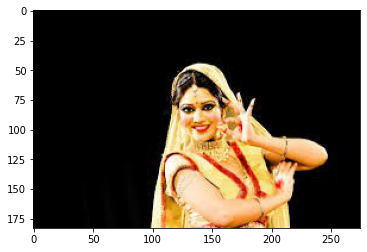

In [36]:
plt.imshow(mpimg.imread(os.path.join(test_dir,fil[0])))

In [0]:
for x in fil:
    train_temp = os.path.join(test_dir,x)
    final_train = os.path.join('/content/sample_data/identify-dance-form/tests/unknown',x)
    copyfile(train_temp, final_train)

In [39]:
tests_dir = '/content/sample_data/identify-dance-form/tests'
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(tests_dir,
                                                  target_size = (156,156),
                                                  color_mode = 'rgb',
                                                  batch_size=32,
                                                  class_mode=None,
                                                  shuffle=False,
                                                  seed=42)

Found 156 images belonging to 1 classes.


In [0]:
img_list = []
for x in test_generator.filenames:
    x = x.split('/')[1]
    img_list.append(x)

In [41]:
print(img_list)

['108.jpg', '11.jpg', '110.jpg', '112.jpg', '114.jpg', '119.jpg', '125.jpg', '128.jpg', '129.jpg', '13.jpg', '132.jpg', '138.jpg', '14.jpg', '145.jpg', '146.jpg', '147.jpg', '150.jpg', '152.jpg', '157.jpg', '162.jpg', '17.jpg', '170.jpg', '171.jpg', '173.jpg', '175.jpg', '183.jpg', '189.jpg', '193.jpg', '194.jpg', '196.jpg', '198.jpg', '20.jpg', '200.jpg', '202.jpg', '206.jpg', '210.jpg', '215.jpg', '216.jpg', '217.jpg', '220.jpg', '224.jpg', '226.jpg', '23.jpg', '232.jpg', '238.jpg', '239.jpg', '246.jpg', '256.jpg', '264.jpg', '269.jpg', '270.jpg', '271.jpg', '275.jpg', '278.jpg', '28.jpg', '280.jpg', '283.jpg', '284.jpg', '285.jpg', '286.jpg', '290.jpg', '291.jpg', '292.jpg', '301.jpg', '302.jpg', '306.jpg', '316.jpg', '317.jpg', '318.jpg', '323.jpg', '324.jpg', '33.jpg', '330.jpg', '332.jpg', '34.jpg', '340.jpg', '346.jpg', '349.jpg', '35.jpg', '354.jpg', '358.jpg', '360.jpg', '363.jpg', '366.jpg', '373.jpg', '374.jpg', '375.jpg', '378.jpg', '38.jpg', '380.jpg', '385.jpg', '386.jpg'

In [42]:
predictions = model.predict_generator(test_generator)

Instructions for updating:
Please use Model.predict, which supports generators.


In [0]:
predicted_clases = np.argmax(predictions,axis=-1)

In [49]:
predicted_clases

array([4, 1, 4, 0, 3, 0, 3, 0, 0, 3, 3, 0, 1, 3, 6, 3, 1, 6, 3, 3, 1, 0,
       0, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 3, 5, 6, 6, 4, 5, 3, 5, 1, 7, 5, 6, 1, 5, 5, 5, 5, 6, 5, 3,
       7, 1, 7, 7, 7, 1, 7, 4, 1, 7, 3, 7, 1, 7, 7, 7, 4, 7, 3, 1, 5, 7,
       1, 7, 3, 4, 3, 4, 6, 0, 1, 6, 1, 3, 1, 3, 7, 3, 3, 3, 4, 0, 3, 3,
       3, 3, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 7, 6, 0, 6, 5, 6, 6, 6, 6, 6,
       6, 1, 3, 6, 3, 0, 6, 3, 6, 6, 1, 1, 2, 1, 0, 7, 1, 4, 4, 4, 1, 4,
       4, 4])

In [50]:
train_generator.class_indices

{'bharatanatyam': 0,
 'kathak': 1,
 'kathakali': 2,
 'kuchipudi': 3,
 'manipuri': 4,
 'mohiniyattam': 5,
 'odissi': 6,
 'sattriya': 7}

In [0]:
data = {'Image': img_list, 'target': predicted_clases}

In [52]:
df = pd.DataFrame(data)
df.head()

,Image,target
0,108.jpg,4
1,11.jpg,1
2,110.jpg,4
3,112.jpg,0
4,114.jpg,3


In [0]:
df['target']= df['target'].map({0: 'bharatanatyam',
                                1: 'kathak',
                                2: 'kathakali',
                                3: 'kuchipudi',
                                4: 'manipuri',
                                5: 'mohiniyattam',
                                6: 'odissi',
                                7: 'sattriya'})

In [54]:
df.head()

,Image,target
0,108.jpg,manipuri
1,11.jpg,kathak
2,110.jpg,manipuri
3,112.jpg,bharatanatyam
4,114.jpg,kuchipudi


In [0]:
df.to_csv(r'sub_dance.csv', index = False)